In [32]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import re

import nltk
from nltk.corpus import stopwords


In [33]:
#read csv.file
df = pd.read_csv('/content/drive/MyDrive/new drive/neural network/yelp.csv')
df.head()

,Unnamed: 0,sentence,label,source
0,0,Wow... Loved this place.,1,yelp
1,1,Crust is not good.,0,yelp
2,2,Not tasty and the texture was just nasty.,0,yelp
3,3,Stopped by during the late May bank holiday of...,1,yelp
4,4,The selection on the menu was great and so wer...,1,yelp


<Axes: xlabel='label', ylabel='count'>

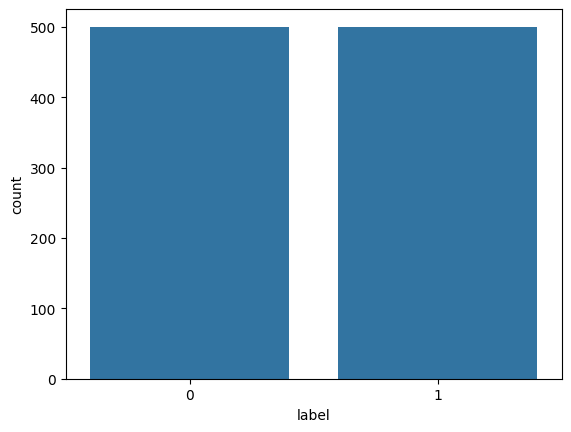

In [34]:
sns.countplot(x=df['label'])

In [36]:
df.dropna(inplace=True)

In [37]:
#null
df.isnull().sum()

,0
Unnamed: 0,0
sentence,0
label,0
source,0


In [38]:
# cleaning data
import nltk # Import the nltk library

nltk.download('stopwords')

import re
from nltk.corpus import stopwords # Import stopwords

# stop_words_set = set(stopwords.words('english')) #Fixed: Indentation removed
def preprocess_text(sentence):
    if not isinstance(sentence, str):
        return ''

    sentence = re.sub(r'[^a-zA-Z\s]', '', sentence)

    sentence = sentence.lower()
    stop_words_set = set(stopwords.words('english'))#Fixed: Moved stop words inside the function
    tokens = [word for word in sentence.split() if word not in stop_words_set]

    return ' '.join(tokens)

df['selected_sentence'] = df['sentence']  # Create 'selected_sentence' as a copy of 'sentence'
df['selected_sentence'] = df['selected_sentence'].apply(preprocess_text)  # Preprocess 'selected_sentence'
df['sentence'] = df['sentence'].apply(preprocess_text) # Preprocess original 'sentence' column as well
df['sentence'] = df['sentence'].astype(str)
df['selected_sentence'] = df['selected_sentence'].astype(str) # apply astype to new column as well

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
# Check if the column 'text' exists in the DataFrame
if 'text' in df.columns:
    df['text'] = df['text'].apply(preprocess_text)
    df['text'] = df['text'].astype(str)
else:
    print("Column 'text' not found in the DataFrame.")


Column 'text' not found in the DataFrame.


In [40]:
print(df.columns)

Index(['Unnamed: 0', 'sentence', 'label', 'source', 'selected_sentence'], dtype='object')


In [24]:
df['selected_sentence']=df['selected_sentence'].apply(preprocess_text) # Changed preprocess_sentence to preprocess_text
df['sentence']=df['sentence'].apply(preprocess_text)
df['sentence'] = df['sentence'].astype(str)

In [41]:
import tensorflow ,keras
from tensorflow.keras.preprocessing.text import Tokenizer

# Assuming 'sentence' column in your dataframe contains the text data
X = df['sentence'].values

token=Tokenizer(oov_token="'")
token.fit_on_texts(X)

In [42]:
(token.word_index)

{"'": 1,
 'food': 2,
 'place': 3,
 'good': 4,
 'service': 5,
 'great': 6,
 'back': 7,
 'like': 8,
 'go': 9,
 'time': 10,
 'really': 11,
 'best': 12,
 'would': 13,
 'ever': 14,
 'dont': 15,
 'also': 16,
 'never': 17,
 'friendly': 18,
 'one': 19,
 'restaurant': 20,
 'nice': 21,
 'amazing': 22,
 'delicious': 23,
 'vegas': 24,
 'im': 25,
 'came': 26,
 'ive': 27,
 'experience': 28,
 'pretty': 29,
 'staff': 30,
 'get': 31,
 'eat': 32,
 'us': 33,
 'minutes': 34,
 'love': 35,
 'even': 36,
 'disappointed': 37,
 'wont': 38,
 'bad': 39,
 'much': 40,
 'definitely': 41,
 'got': 42,
 'well': 43,
 'going': 44,
 'made': 45,
 'first': 46,
 'could': 47,
 'say': 48,
 'think': 49,
 'chicken': 50,
 'better': 51,
 'menu': 52,
 'salad': 53,
 'stars': 54,
 'always': 55,
 'pizza': 56,
 'fresh': 57,
 'worst': 58,
 'ordered': 59,
 'way': 60,
 'wait': 61,
 'steak': 62,
 'want': 63,
 'didnt': 64,
 'taste': 65,
 'quality': 66,
 'server': 67,
 'times': 68,
 'sushi': 69,
 'wasnt': 70,
 'flavor': 71,
 'burger': 72,
 '

In [43]:
max(token.word_index)

'zero'

In [45]:
len(X)

1000

In [47]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = token.texts_to_sequences(X)

padded = pad_sequences(sentences, padding='pre')
padded.shape

(1000, 18)

In [48]:
max(len(x) for x in sentences)

18

In [51]:
from keras import Sequential
from keras.layers import Dense,LSTM , Dropout ,Embedding

y = df['label'].values
model=Sequential()
model.add(Embedding(len(token.word_index) + 1, 100, input_length=padded.shape[1])) # Add an Embedding layer to create the 'features' dimension
model.add(LSTM(150))
model.add(Dense(16,activation='relu'))
model.add(Dense(3,activation='softmax'))


model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['Accuracy'])

model.fit(padded,y,epochs=5) # Now 'y' is defined and can be used in model.fit

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - Accuracy: 0.4599 - loss: 0.8626
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - Accuracy: 0.5346 - loss: 0.6870
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - Accuracy: 0.7059 - loss: 0.6378
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - Accuracy: 0.7611 - loss: 0.4789
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - Accuracy: 0.9322 - loss: 0.2005


In [53]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# ... (rest of your code) ...

# Before fitting the model, create and fit the LabelEncoder:
encode = LabelEncoder()
encode.fit(df['label'])

# ... (rest of your code) ...

# After predicting the sentiment:
sentiment_label = encode.inverse_transform([predicted_label])[0]

# ... (rest of your code) ...

In [54]:
# Select a specific sentence from test.csv by index (e.g., index 10)
index = 51  # Change this to the desired index
selected_sentence = df['sentence'][index]  # Access the 'text' column

# Preprocess the selected sentence
processed_sentence = preprocess_text(selected_sentence)

# Tokenize and pad the selected sentence
sentence_sequence = token.texts_to_sequences([processed_sentence])
padded_sentence = pad_sequences(sentence_sequence, padding='pre', maxlen=padded.shape[1])

# Predict the sentiment
sentiment_prediction = model.predict(padded_sentence)
predicted_label = np.argmax(sentiment_prediction, axis=1)[0]

# Get the sentiment label (e.g., 'positive', 'negative', 'neutral')
sentiment_label = encode.inverse_transform([predicted_label])[0]

print(f"Sentence: {selected_sentence}")
print(f"Predicted Sentiment: {sentiment_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Sentence: came running us realized husband left sunglasses table
Predicted Sentiment: 0


In [59]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

def predict_sentiment(user_input):
  """Predicts the sentiment of user input.

  Args:
    user_input: The text input from the user.

  Returns:
    The predicted sentiment label (e.g., 'positive', 'negative', 'neutral').
  """
  # Preprocess the user input
  processed_input = preprocess_text(user_input)

  # Tokenize and pad the input
  input_sequence = token.texts_to_sequences([processed_input])
  padded_input = pad_sequences(input_sequence, padding='pre', maxlen=padded.shape[1])

  # Predict the sentiment
  sentiment_prediction = model.predict(padded_input)
  predicted_label = np.argmax(sentiment_prediction, axis=1)[0]

  # Get the sentiment label
  # Assuming 'encode' is defined and available in your environment
  # Replace with your actual label encoding if different
  sentiment_label = encode.inverse_transform([predicted_label])[0]

  return sentiment_label

# Get user input
user_input = input("Enter a sentence: ")

# Predict and print the sentiment
predicted_sentiment = predict_sentiment(user_input)
print(f"Sentence: {user_input}")
print(f"Predicted Sentiment: {predicted_sentiment}")


Enter a sentence: get the ball
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Sentence: get the ball
Predicted Sentiment: 0
